## 1. Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from jcopml.pipeline import num_pipe, cat_pipe

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Import Dataset

In [2]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

## 3. Exploratory Data Analysis

In [3]:
df = df.drop(columns=[
    'SEQN', 'Ratio_Family_Income_Poverty', 'Health_Insurance', 'Annual_Family_Income', 'Height', 'X60_sec_pulse', 
    'Lymphocyte', 'Monocyte', 'Eosinophils', 'Total_Cholesterol', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Hematocrit',
    'Segmented_Neutrophils'])

In [4]:
# Nama kolom yang ingin Anda cari indeksnya
columns_to_find =['Gender', 'Vigorous_work', 'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

# Mendapatkan indeks kolom
column_indices = [df.columns.get_loc(column) for column in columns_to_find]

print(column_indices)

[0, 32, 33, 34, 35, 36]


## 4. Pre-Processing

In [5]:
# Mengatur pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)
df.describe()

,Gender,Age,Systolic,Diastolic,Weight,Body_Mass_Index,White_Blood_Cells,Basophils,Red_Blood_Cells,Hemoglobin,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,124.090078,69.919253,80.988276,28.824588,7.269524,0.700906,4.668632,14.139073,33.897452,253.012886,8.196637,13.082278,42.528116,70.789611,25.722511,25.601850,5.077399,78.632276,5.595013,29.459667,15.266181,132.045632,1.203049,11.801173,72.050158,321.723326,1.695405,2.863667,1.370344,5.676496,1.783840,1.598856,1.907333,1.549502,1.796165,0.040670
std,0.499830,18.010440,19.254741,13.575804,20.678734,6.608982,2.478754,0.474369,0.509368,1.541599,0.932481,67.403298,0.923022,1.304517,3.585254,26.073559,19.695625,25.889693,1.079629,39.157384,2.059786,43.576787,6.416872,31.961662,0.182223,5.276652,4.967992,86.129723,1.283654,0.953910,0.415985,1.050223,0.448324,0.511199,0.349674,0.497550,0.402853,0.197527
min,1.000000,20.000000,0.000000,0.000000,32.300000,13.180000,1.400000,0.000000,2.260000,5.800000,27.800000,4.000000,4.700000,9.700000,19.000000,7.000000,7.000000,4.000000,0.155000,17.700000,1.050000,3.000000,0.900000,4.000000,0.484000,0.000000,47.000000,23.800000,0.102000,-10.826000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,33.000000,111.000000,62.000000,66.500000,24.220000,5.700000,0.400000,4.320000,13.100000,33.300000,208.000000,7.600000,12.300000,40.000000,55.000000,19.000000,16.000000,4.319000,61.880000,4.718000,14.000000,10.900000,113.000000,1.098000,8.550000,69.000000,261.700000,0.903000,2.217500,1.070000,5.200000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,48.000000,121.000000,70.000000,78.200000,27.800000,6.900000,0.600000,4.660000,14.100000,33.861696,246.000000,8.100000,12.800000,43.000000,67.000000,23.000000,21.000000,4.991000,73.370000,5.110000,20.000000,14.500000,128.000000,1.195000,10.260000,72.000000,315.200000,1.344000,2.805000,1.290000,5.400000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,63.000000,134.000000,78.000000,92.100000,32.100000,8.400000,0.900000,5.010000,15.200000,34.500000,290.000000,8.800000,13.500000,45.000000,82.000000,27.000000,28.000000,5.740000,88.400000,5.662000,31.000000,18.800000,146.000000,1.324000,13.680000,75.000000,374.700000,2.066000,3.445250,1.600000,5.800000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,2.000000,85.000000,270.000000,132.000000,371.000000,130.210000,117.200000,13.900000,8.300000,19.700000,44.900000,1000.000000,15.100000,37.800000,57.000000,729.000000,1672.000000,1997.000000,14.611000,1573.520000,34.250000,2274.000000,99.800000,1539.000000,2.648000,224.010000,113.000000,1070.600000,34.559000,11.335000,5.840000,18.800000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000


### Outlier Detection and Removal:

In [6]:
# plt.figure(figsize=(100,20), facecolor='w')
# sns.boxplot(data=df)
# plt.show()

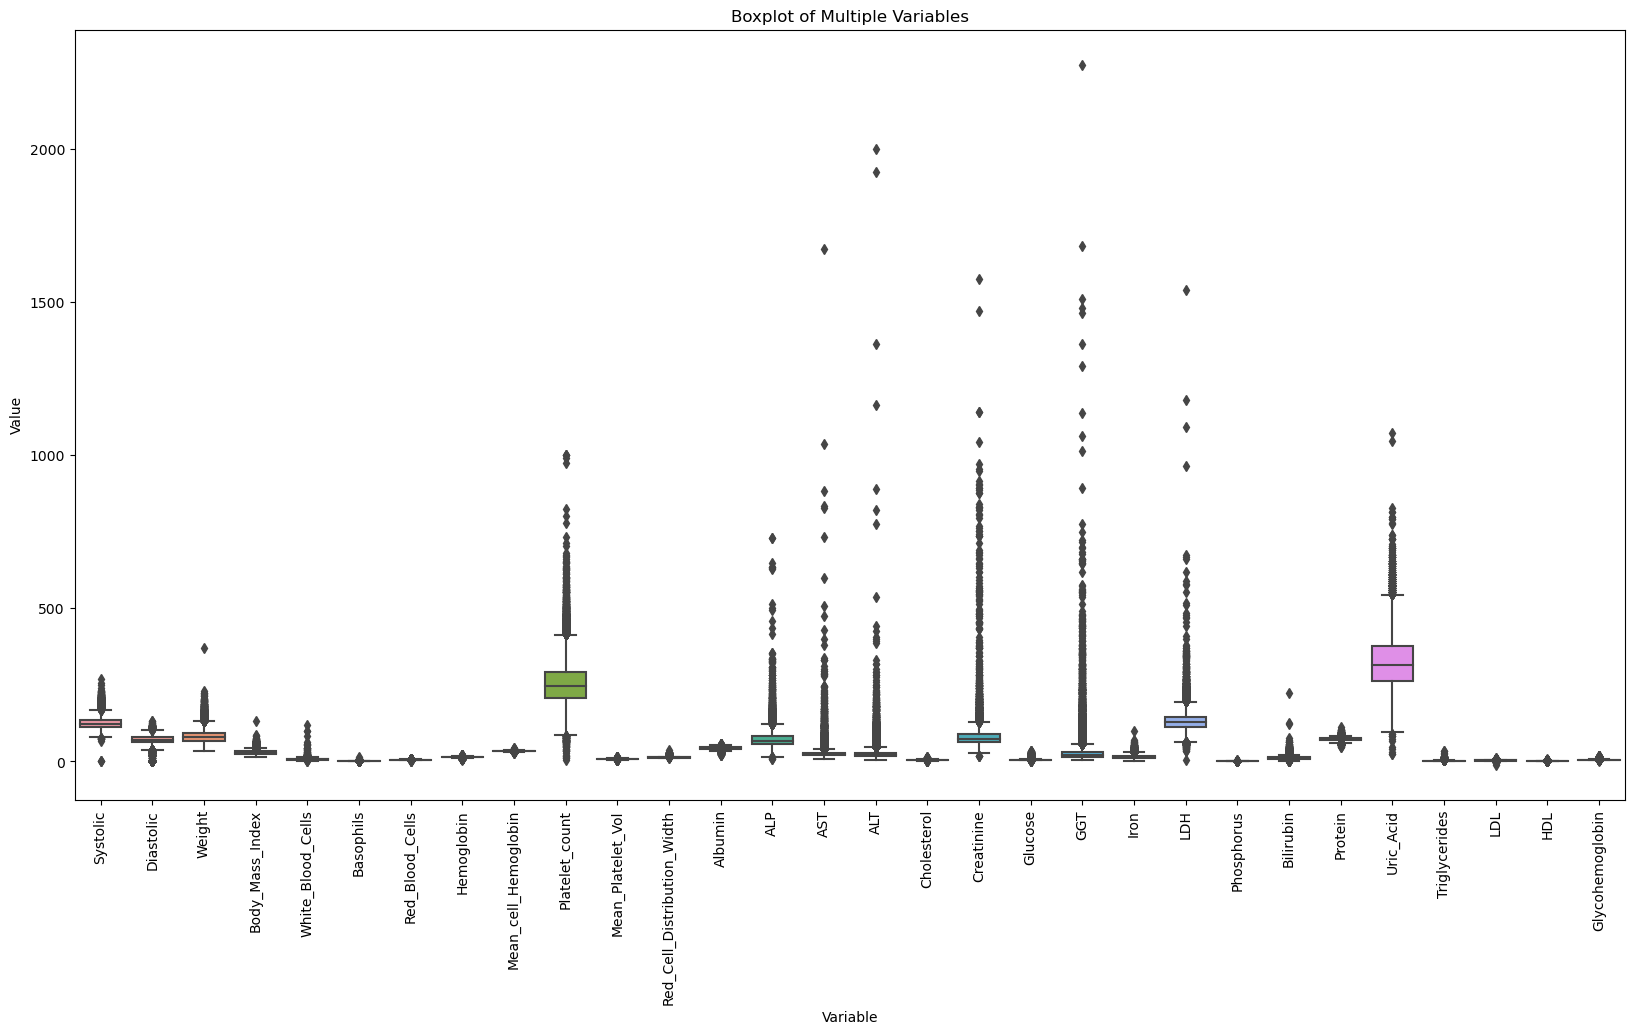

In [7]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# # Menggabungkan data untuk plot
melted_df = df[num_variables].melt(var_name='Variable', value_name='Value')

# Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)

# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()
plt.show()

In [8]:
# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[column].mean()
        
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers with mean
df_clean = replace_outliers_with_mean(df, num_variables)

# Menampilkan data asli
print("Data Data Asli")
print(df)

# Menampilkan data setelah penghapusan outlier
print("\nData setelah replace dengan mean:")
print(df_clean)

Data Data Asli
       Gender  Age    Systolic  Diastolic  Weight  Body_Mass_Index  \
0           1   77   98.000000       56.0    75.4            24.90   
1           1   49  122.000000       83.0    92.5            29.10   
2           1   37  124.090078       99.0    99.2            30.62   
3           1   70  130.000000       66.0    63.6            25.57   
4           1   81  136.000000       61.0    75.5            27.33   
...       ...  ...         ...        ...     ...              ...   
37074       1   25  112.000000       76.0    39.2            21.00   
37075       2   76  112.000000       46.0    59.1            21.50   
37076       2   80  146.000000       58.0    71.7            31.00   
37077       1   35  106.000000       66.0    78.2            26.00   
37078       2   24  114.000000       68.0    58.3            21.40   

       White_Blood_Cells  Basophils  Red_Blood_Cells  Hemoglobin  \
0                    7.6        0.5             4.73        14.1   
1       

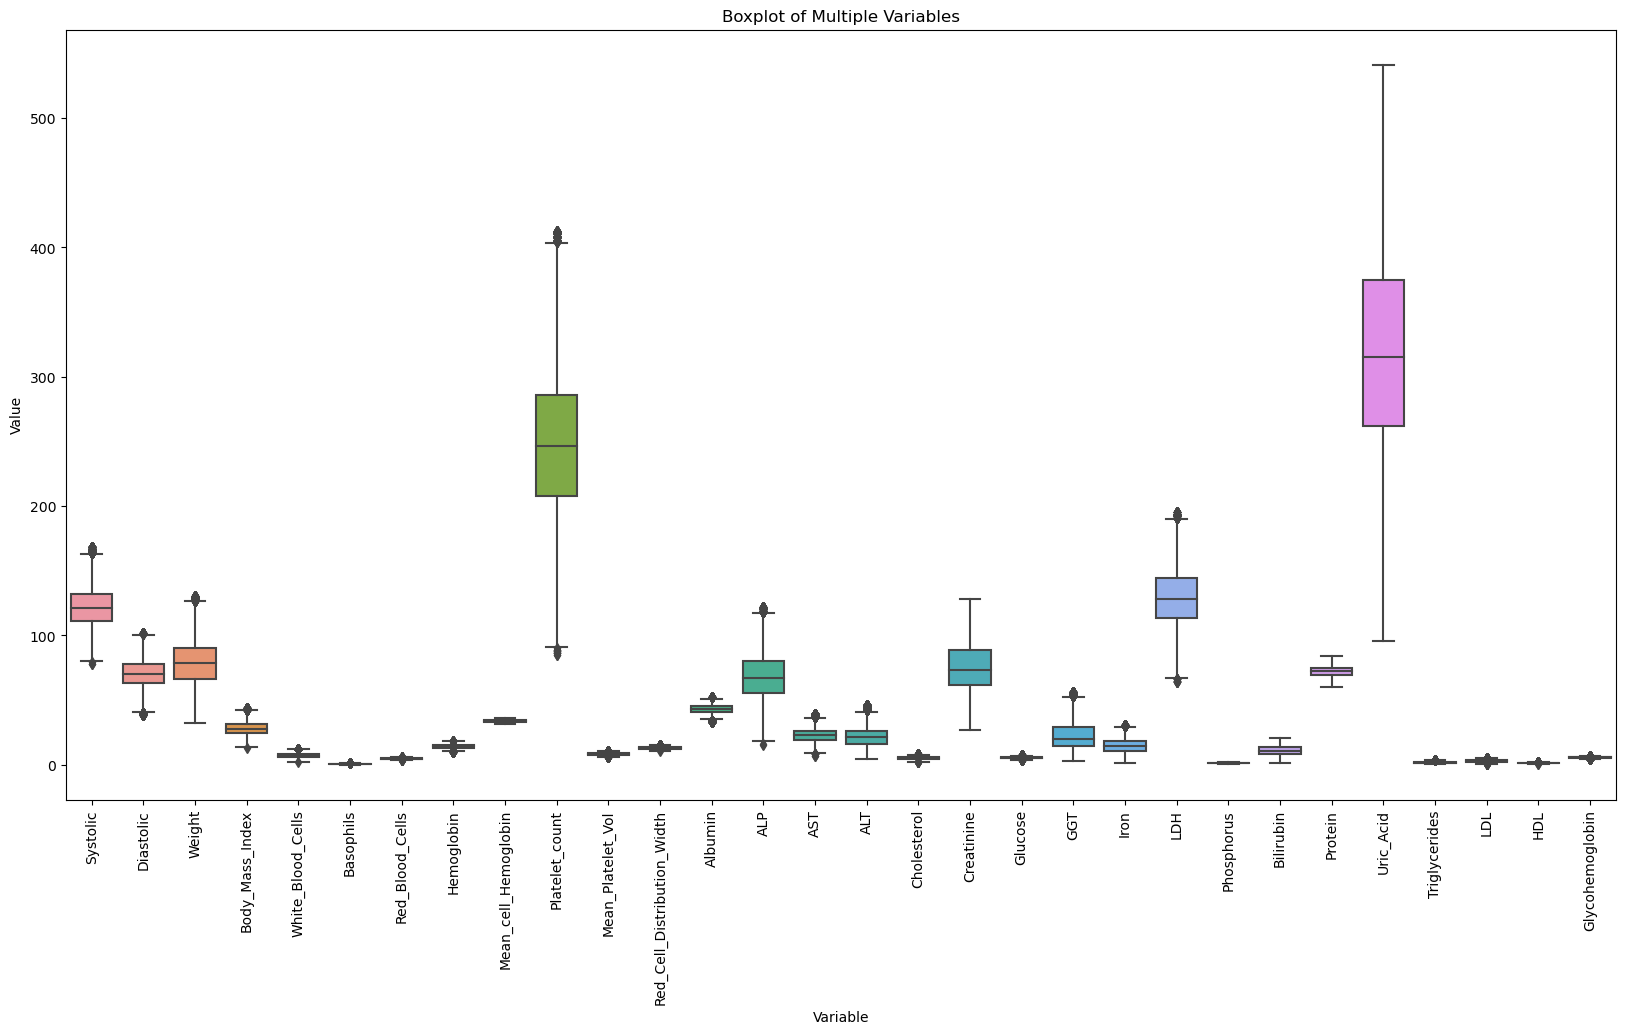

In [9]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df_clean, columns):
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
#         mean_value = df[column].mean()
#         df.loc[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound), column] = mean_value
        
        median_value = df[column].median()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Menggabungkan data untuk plot
melted_df = df_clean[num_variables].melt(var_name='Variable', value_name='Value')

# # Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)

# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df_clean[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()

plt.show()



## Menghitung korelasi

Features identified for removal: {'Hemoglobin', 'Body_Mass_Index', 'LDL'}
Remaining features after correlation thresholding: Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'White_Blood_Cells',
       'Basophils', 'Red_Blood_Cells', 'Mean_cell_Hemoglobin',
       'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid',
       'Triglycerides', 'HDL', 'Glycohemoglobin', 'Vigorous_work',
       'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'],
      dtype='object')


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

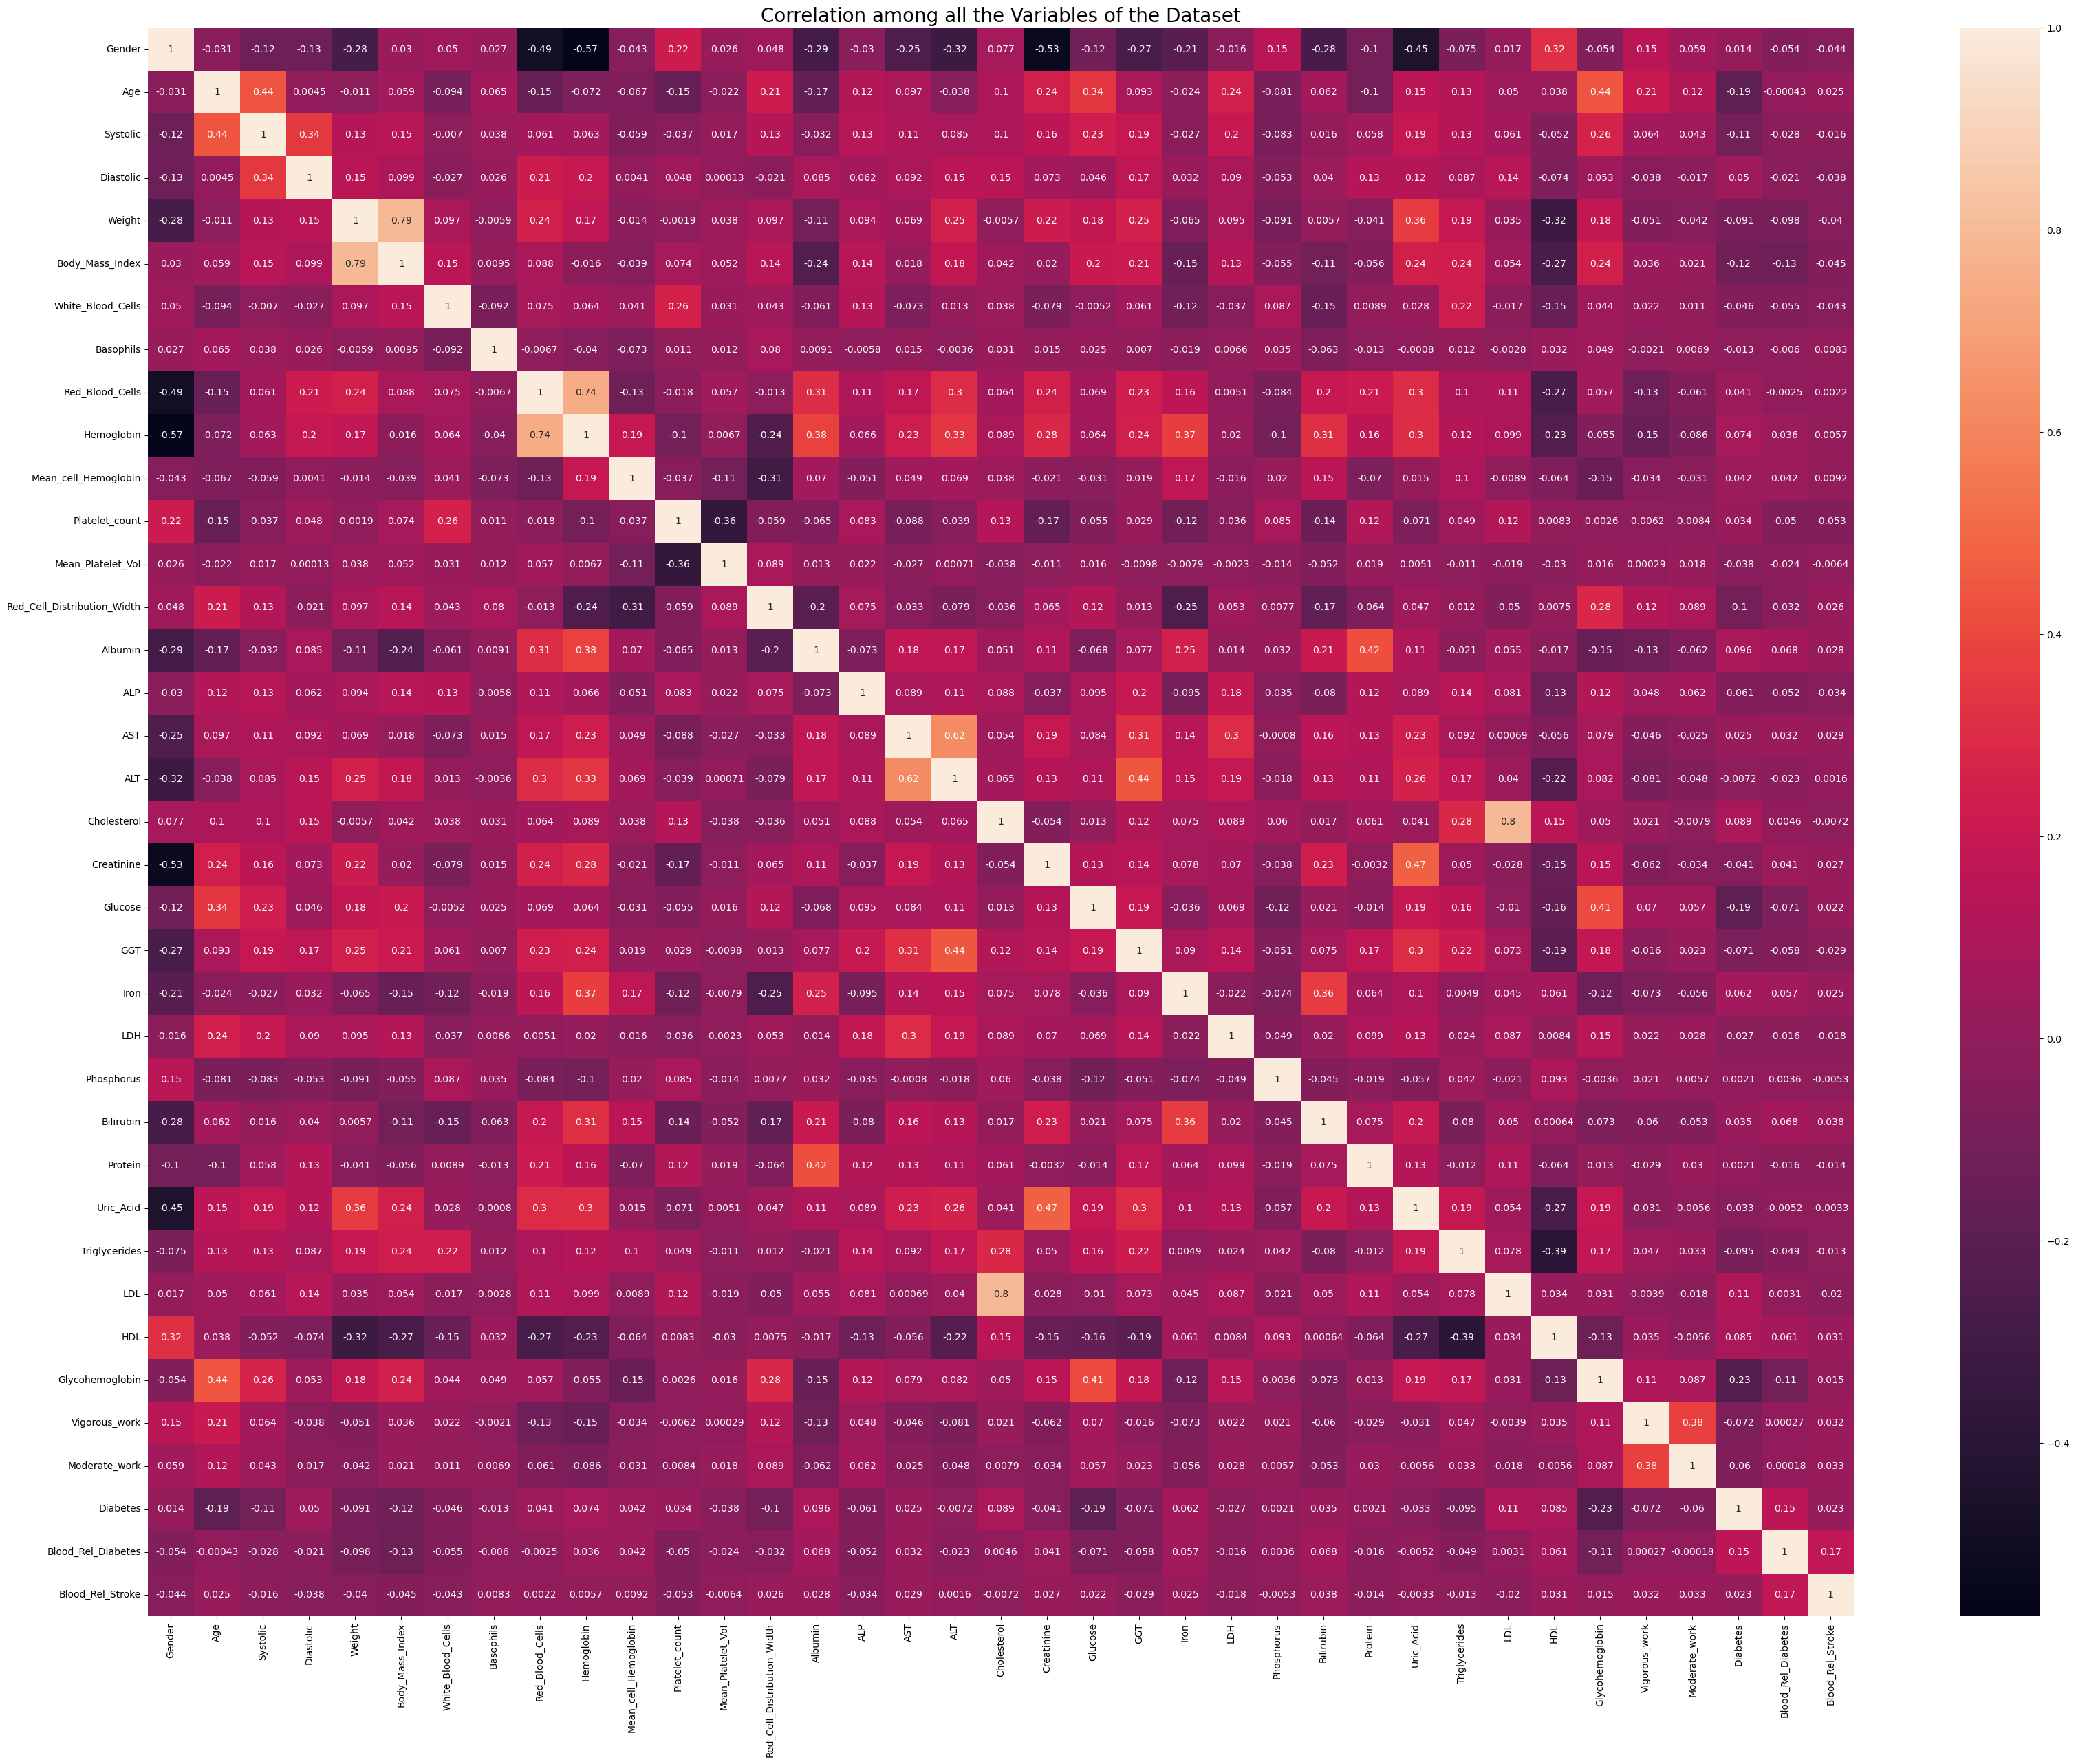

In [10]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target column for the correlation matrix
df_features = df.drop(columns='CoronaryHeartDisease')

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set the correlation threshold
threshold = 0.7

# Identify features to drop based on the threshold
col_corr = set()  # Set of all the names of correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Absolute value of the correlation coefficient
            colname = correlation_matrix.columns[i]  # Getting the name of the column
            col_corr.add(colname)

# Print the identified features for review
print(f"Features identified for removal: {col_corr}")

# Remove the highly correlated features
df_reduced = df_features.drop(columns=col_corr)

print(f"Remaining features after correlation thresholding: {df_reduced.columns}")

# Optionally, add the target variable back to the reduced dataframe
df_reduced['CoronaryHeartDisease'] = df['CoronaryHeartDisease']

#Checking relationship between variables
cor=df_features.corr()
plt.figure(figsize=(40,30), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

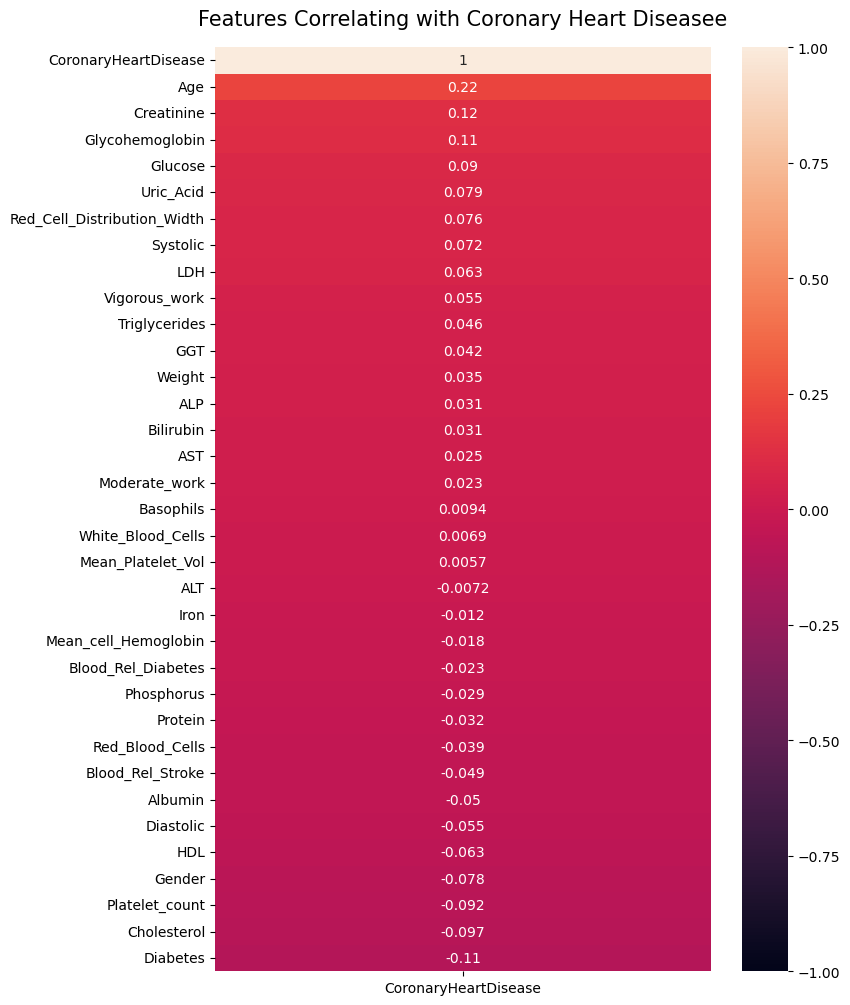

In [11]:
#  korelasi semua fitur dengan 'CoronaryHeartDisease', sebuah variabel dependen tunggal, yang diurutkan berdasarkan 'CoronaryHeartDisease' secara menurun.
df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Coronary Heart Diseasee', fontdict={'fontsize':15}, pad=16);

## Feature Splitting

In [12]:
X = df_reduced.drop(columns='CoronaryHeartDisease') #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df_reduced['CoronaryHeartDisease'] #y atribut label (dependent)

### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1, 
                                                    stratify = y, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56913, 34), (14229, 34), (56913,), (14229,))

## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [13]:
#SMOTE
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC

# Resampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan hasil resampling
print("Sebelum resampling, distribusi kelas pada training set:")
print(pd.Series(y).value_counts())
print("\nSetelah resampling, distribusi kelas pada training set:")
print(pd.Series(y_resampled).value_counts())
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')

print('\nBalance of positive and negative classes (%):')
y_resampled.value_counts(normalize=True) * 100

Sebelum resampling, distribusi kelas pada training set:
0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

Setelah resampling, distribusi kelas pada training set:
0    35571
1    35571
Name: CoronaryHeartDisease, dtype: int64
Shape of X before SMOTE: (37079, 34)
Shape of X after SMOTE: (71142, 34)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: CoronaryHeartDisease, dtype: float64

In [ ]:
print(f"Shape of X_train_selected: {X_resampled.shape}")
print(f"Shape of y_train: {y_resampled.shape}")

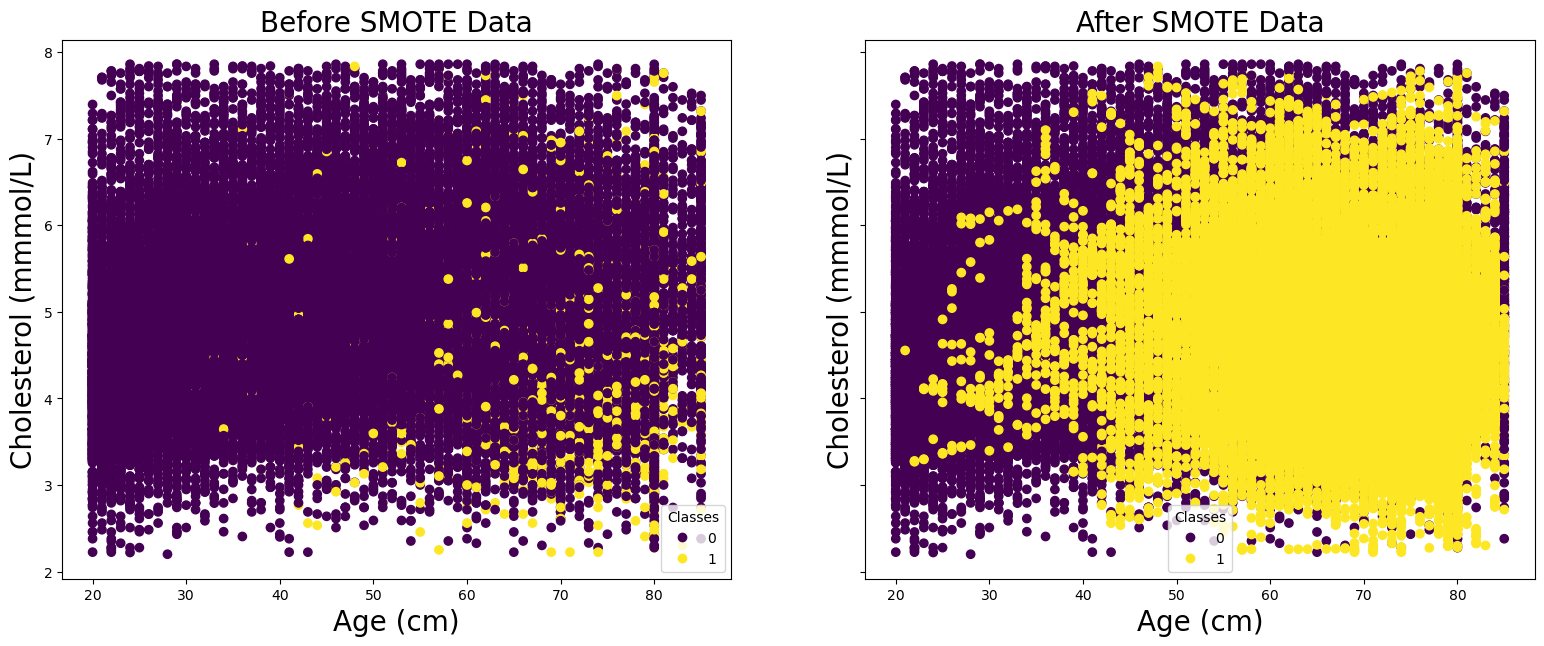

In [14]:
import matplotlib.pyplot as plt

# Create subplots
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(19, 7), sharey=True)

# Scatter plot for before SMOTE
scatter0 = ax0.scatter(x=X['Age'], y=X['Cholesterol'], c=y)
ax0.set_title('Before SMOTE Data', fontsize=20)  # Set title with larger font size
ax0.set_xlabel('Age (cm)', fontsize=20)  # Set x-axis label with larger font size
ax0.set_ylabel('Cholesterol (mmmol/L)', fontsize=20)  # Set y-axis label with larger font size
ax0.legend(*scatter0.legend_elements(), title='Classes')

# Scatter plot for after SMOTE
scatter1 = ax1.scatter(x=X_resampled['Age'], y=X_resampled['Cholesterol'], c=y_resampled)
ax1.set_title('After SMOTE Data', fontsize=20)  # Set title with larger font size
ax1.set_xlabel('Age (cm)', fontsize=20)  # Set x-axis label with larger font size
ax1.set_ylabel('Cholesterol (mmmol/L)', fontsize=20)  # Set y-axis label with larger font size
ax1.legend(*scatter1.legend_elements(), title='Classes')

# Show plot
plt.show()


## Training to get the hyperparameter

In [17]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

from jcopml.tuning.space import Integer, Real
from skopt.space import Categorical

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

### SelectKBest

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Misalnya kita punya dataset X_resampled (fitur), y_resampled (target) dan X_test
# X_resampled, y_resampled = load_your_data()
# X_test = load_your_test_data()

# Feature selection menggunakan SelectKBest
k = 30  # Memilih 30 fitur terbaik
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k)
X_train_selected = selector.fit_transform(X_resampled, y_resampled)
X_test_selected = selector.transform(X_test)

# Mendapatkan skor dari semua fitur
scores = selector.scores_

# Mendapatkan indeks dari fitur yang terpilih
selected_features_indices = selector.get_support(indices=True)

# Mendapatkan skor dari fitur yang terpilih
selected_scores = scores[selected_features_indices]

# Membuat DataFrame untuk memudahkan interpretasi
feature_scores = pd.DataFrame({
    'Feature': X_resampled.columns[selected_features_indices],
    'Score': selected_scores
})

# Menampilkan skor fitur yang terpilih
print(feature_scores.sort_values(by='Score', ascending=False))

                        Feature     Score
7               Red_Blood_Cells  0.570648
5             White_Blood_Cells  0.568717
16                  Cholesterol  0.562200
13                          ALP  0.561535
27                          HDL  0.560302
26                Triglycerides  0.560123
20                         Iron  0.559420
21                          LDH  0.557376
10            Mean_Platelet_Vol  0.548146
11  Red_Cell_Distribution_Width  0.544856
2                      Systolic  0.541780
9                Platelet_count  0.540529
19                          GGT  0.539958
22                   Phosphorus  0.539798
15                          ALT  0.539666
18                      Glucose  0.538598
17                   Creatinine  0.538086
3                     Diastolic  0.529329
24                      Protein  0.523944
14                          AST  0.520614
28              Glycohemoglobin  0.515226
4                        Weight  0.511130
6                     Basophils  0

In [ ]:
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")
print(f"Shape of y_train: {y_resampled.shape}")

### Optuna Import

In [19]:
from hyperopt import fmin, tpe, rand, Trials, hp
import optuna
from optuna.trial import TrialState

[I 2024-10-06 18:27:21,616] A new study created in memory with name: no-name-686237e5-3a87-4574-881a-39944e97e6a9
[I 2024-10-06 18:29:37,614] Trial 0 finished with value: 0.9646478725677557 and parameters: {'n_estimators': 213, 'learning_rate': 0.013264718449436351, 'max_depth': 16, 'subsample': 0.864628248149763, 'max_features': 'log2', 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9646478725677557.
[I 2024-10-06 18:30:15,690] Trial 1 finished with value: 0.9807074343631579 and parameters: {'n_estimators': 137, 'learning_rate': 0.34119267627632005, 'max_depth': 10, 'subsample': 0.6175062068769389, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.9807074343631579.
[I 2024-10-06 18:32:23,640] Trial 2 finished with value: 0.9881046876758097 and parameters: {'n_estimators': 482, 'learning_rate': 0.23001067715317913, 'max_depth': 17, 'subsample': 0.9339503317158552, 'max_features': 'log2', 'min_samples_sp

RS - Best parameters: {'n_estimators': 362, 'learning_rate': 0.18437349720350235, 'max_depth': 17, 'subsample': 0.8320543856711753, 'max_features': 'sqrt', 'min_samples_split': 20, 'min_samples_leaf': 13}
RS - Best accuracy: 0.9887
Optuna - Computation time: 2336.62 seconds
Iteration 1
  Accuracy: 0.9646478725677557
  Hyperparameters: {'n_estimators': 213, 'learning_rate': 0.013264718449436351, 'max_depth': 16, 'subsample': 0.864628248149763, 'max_features': 'log2', 'min_samples_split': 17, 'min_samples_leaf': 9}
  -------
Iteration 2
  Accuracy: 0.9807074343631579
  Hyperparameters: {'n_estimators': 137, 'learning_rate': 0.34119267627632005, 'max_depth': 10, 'subsample': 0.6175062068769389, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 7}
  -------
Iteration 3
  Accuracy: 0.9881046876758097
  Hyperparameters: {'n_estimators': 482, 'learning_rate': 0.23001067715317913, 'max_depth': 17, 'subsample': 0.9339503317158552, 'max_features': 'log2', 'min_samples_split': 2

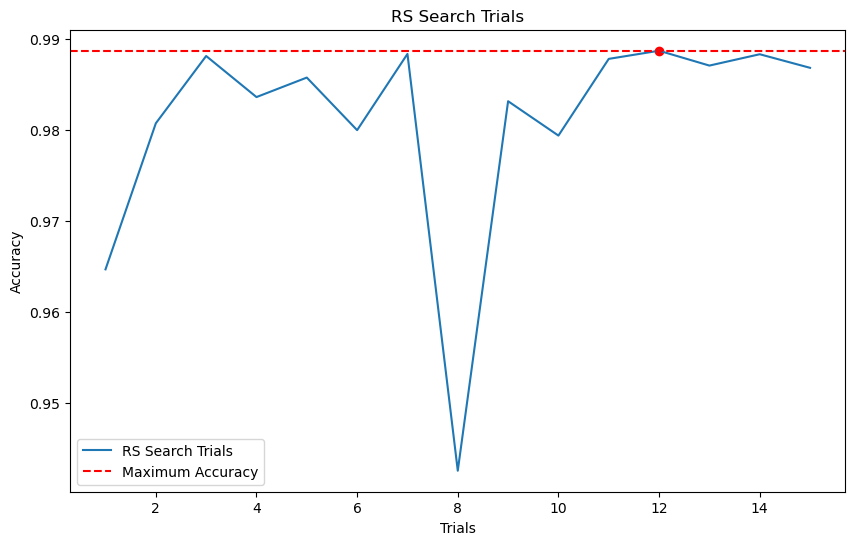

In [20]:
import time

# define an objective function for Optuna
def objective(trial, random_state=42, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), X=X_train_selected, y=y_resampled):
    
    # Suggest hyperparameters using Optuna's trial.suggest methods
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    # Create GradientBoostingClassifier with suggested hyperparameters
    clf = GradientBoostingClassifier(random_state=random_state, **params)
    
    # Conduct cross-validation and calculate mean accuracy score
    score = cross_val_score(clf, X_train_selected, y_resampled, cv=cv, scoring="accuracy", n_jobs=-1).mean()

    return score  # Return the accuracy score for maximizing

def optuna_debugging(study):
    for i, trial in enumerate(study.trials):
        accuracy = trial.value
        print(f"Iteration {i+1}")
        print(f"  Accuracy: {accuracy}")
        print(f"  Hyperparameters: {trial.params}")
        print("  -------")

# Function to run optimization with a given algorithm
def run_optimization(max_evals=100):
    # Start measuring time
    start_time = time.time()

    # Create an Optuna study
    study = optuna.create_study(direction="maximize")

    # Run optimization
    study.optimize(objective, n_trials=max_evals)

    # End time measurement
    end_time = time.time()
    computation_time = end_time - start_time

    # Best parameters found
    print(f'RS - Best parameters: {study.best_params}')
    print(f'RS - Best accuracy: {study.best_value:.4f}')
    print(f'RS - Computation time: {computation_time:.2f} seconds')

    # Display the optimization process
    optuna_debugging(study)

    # Train the final model using the best hyperparameters
    best_params = study.best_params
    model = GradientBoostingClassifier(
        random_state=42, 
        n_estimators=int(best_params['n_estimators']),
        learning_rate=best_params['learning_rate'],
        max_depth=int(best_params['max_depth']),
        subsample=best_params['subsample'],
        max_features=best_params['max_features']
    )
    model.fit(X_train_selected, y_resampled)
    training_accuracy = model.score(X_train_selected, y_resampled)
    print(f'RS - Training Accuracy: {training_accuracy:.4f}')

    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'RS - Test Accuracy: {accuracy:.4f}')
    print('---------------------------------------------------------------------------')

    # Plot trials search space
    accuracies = [trial.value for trial in study.trials if trial.state == TrialState.COMPLETE]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracies) + 1), accuracies, label='RS Search Trials')
    max_acc_idx = np.argmax(accuracies)
    plt.axhline(np.max(accuracies), color='r', linestyle='--', label='Maximum Accuracy')
    plt.scatter(max_acc_idx + 1, accuracies[max_acc_idx], color='red')
    plt.title('RS Search Trials')
    plt.xlabel('Trials')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return study, y_pred, model, accuracy


# Run optimization
study, y_pred, model, accuracy = run_optimization(max_evals=15)

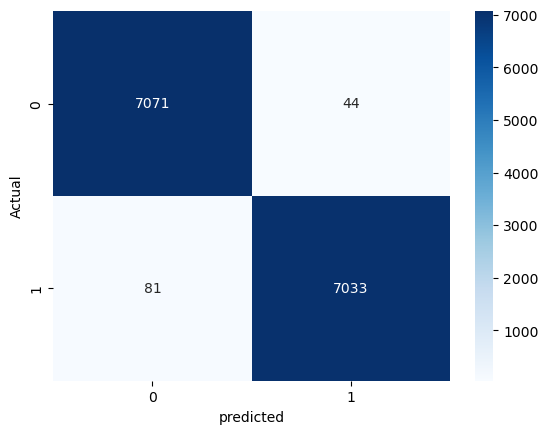

confussion matrix
[[7071   44]
 [  81 7033]]


Accuracy of Gradient Boosting: 99.12151240424485 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7115
           1       0.99      0.99      0.99      7114

    accuracy                           0.99     14229
   macro avg       0.99      0.99      0.99     14229
weighted avg       0.99      0.99      0.99     14229

Precision: 0.9938
Recall: 0.9886
F1-Score: 0.9912


In [21]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
# gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.savefig('confussion matrix', dpi=350, bbox_inches='tight')
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred))


# Menghitung nilai Precision, Recall, dan F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

AUC-ROC: 0.9996


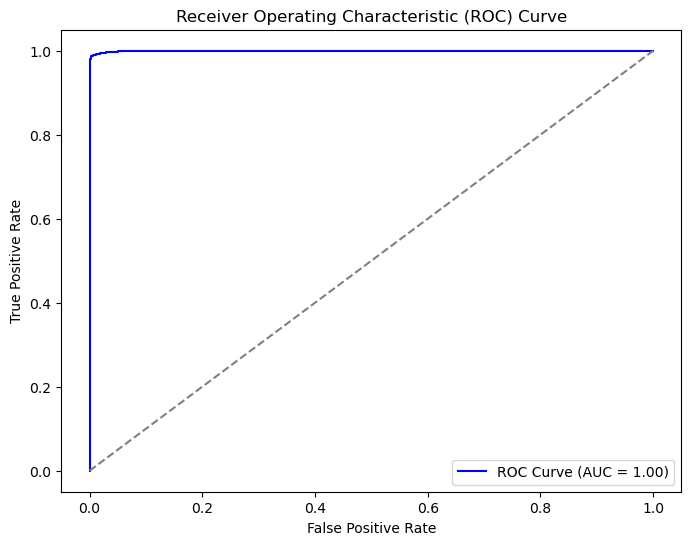

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_score:.4f}')

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve', dpi=350, bbox_inches='tight')
plt.show()